<a href="https://colab.research.google.com/github/Marieke-do/Assignment---Global-CO2-emissions/blob/main/Kopie_van_Assignment_Global_CO2_emissions(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")

global_co2= tables[1]





In [3]:
#rename columns
global_co2.columns =["country", "co2_1990", "co2_2005", "co2_2017", "co2_2017_world_percentage", "co2_2017_1990_change", "per_landarea", "per_capita"]


In [4]:
# Filter out the rows in this table that aren't countries
global_co2_countries = global_co2.iloc[3:]
global_co2_countries


,country,co2_1990,co2_2005,co2_2017,co2_2017_world_percentage,co2_2017_1990_change,per_landarea,per_capita
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9
...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3


In [5]:
# Sort by biggest CO2 producers
sorted_global_co2_countries = global_co2_countries.sort_values(by=["co2_2017"], ascending = False)
sorted_global_co2_countries


,country,co2_1990,co2_2005,co2_2017,co2_2017_world_percentage,co2_2017_1990_change,per_landarea,per_capita
42,China,2397.048,6263.064,10877.218,29.34%,353.8%,1133.0,7.7
202,United States,5085.897,5971.571,5107.393,13.77%,0.4%,519.0,15.7
67,European Union,4409.339,4249.995,3548.345,9.57%,-19.5%,793.0,7.0
93,India,605.968,1210.754,2454.774,6.62%,305.1%,747.0,1.8
158,Russia,2378.921,1733.950,1764.866,4.76%,-25.8%,103.0,12.3
...,...,...,...,...,...,...,...,...
68,Falkland Islands,0.013,0.016,0.038,0.00%,192.3%,3.0,13.1
106,Kiribati,0.020,0.033,0.030,0.00%,50.0%,37.0,0.3
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9
160,"Saint Helena, Ascension and Tristan da Cunha",0.010,0.010,0.015,0.00%,50.0%,49.0,3.7


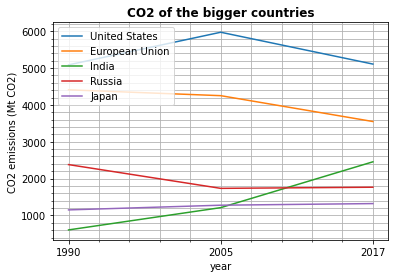

In [7]:
# Graph 1: CO2 of the bigger countries
# Make a graph of the CO2 emissions of the 5 biggest CO2 producers in the world
# top5 = global_co2.loc[[42, 202, 67, 93, 158], ["country", "co2_1990", "co2_2005", "co2_2017"]]
# top5
top5 = sorted_global_co2_countries.iloc[1:6, 0:4]
# top5

fig, ax = plt.subplots()
years = ["1990", "2005", "2017"] 

for index, row in top5.iterrows():
  plt.plot(years, row[1:], label = row[0])

ax.legend(loc = "upper left")
ax.set_title("CO2 of the bigger countries", fontweight = "bold")
ax.set_xlabel("year")
ax.set_ylabel("CO2 emissions (Mt CO2)")
ax.grid(which = 'both')
ax.minorticks_on()


In [8]:
# Graph 2: worst and best changers

# Calculate the relative change in CO2 emission 
global_co2_countries["rel_1990"]= 100
global_co2_countries["rel_2005"] = (global_co2.loc[:,"co2_2005"]/ global_co2.loc[:,"co2_1990"]) *100 
global_co2_countries["rel_2017"] = (global_co2.loc[:,"co2_2017"]/ global_co2.loc[:,"co2_1990"]) *100

# sort by rel_2017

sorted_global_co2_countries= global_co2_countries.sort_values(by=["rel_2017"], ascending = False)
sorted_global_co2_countries



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,country,co2_1990,co2_2005,co2_2017,co2_2017_world_percentage,co2_2017_1990_change,per_landarea,per_capita,rel_1990,rel_2005,rel_2017
81,Greenland,0.003,0.631,0.518,0.00%,"17,166.7%",0.0,9.2,100,21033.333333,17266.666667
34,Cambodia,0.407,2.686,10.560,0.03%,"2,494.6%",58.0,0.7,100,659.950860,2594.594595
62,Equatorial Guinea,0.097,3.371,2.469,0.01%,"2,445.4%",88.0,1.9,100,3475.257732,2545.360825
197,Turks and Caicos Islands,0.007,0.005,0.165,0.00%,"2,257.1%",174.0,4.7,100,71.428571,2357.142857
37,Cape Verde,0.049,0.227,0.955,0.00%,"1,849.0%",237.0,1.7,100,463.265306,1948.979592
...,...,...,...,...,...,...,...,...,...,...,...
76,Georgia,34.745,4.979,11.558,0.03%,-66.7%,166.0,3.0,100,14.330119,33.265218
141,North Korea,131.365,79.568,37.774,0.10%,-71.2%,313.0,1.5,100,60.570167,28.754996
199,Ukraine,783.210,354.429,205.723,0.55%,-73.7%,341.0,4.7,100,45.253380,26.266646
128,Moldova,31.957,8.139,8.263,0.02%,-74.1%,244.0,2.0,100,25.468598,25.856620


In [14]:
# select rows and colums for graph
top_co2_change = sorted_global_co2_countries.iloc[[0,1,2, -3,-2,-1], [0,8,9,10]]
top_co2_change


,country,rel_1990,rel_2005,rel_2017
81,Greenland,100,21033.333333,17266.666667
34,Cambodia,100,659.950860,2594.594595
62,Equatorial Guinea,100,3475.257732,2545.360825
199,Ukraine,100,45.253380,26.266646
128,Moldova,100,25.468598,25.856620
10,Armenia,100,21.943089,23.344123


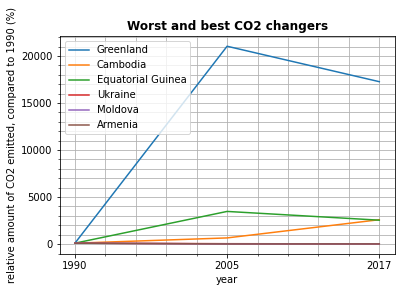

In [15]:
# plot graph

fig, ax = plt.subplots()


for index, row in top_co2_change.iterrows():
  plt.plot(years, row[1:], label = row[0])

ax.legend(loc = "upper left")
ax.set_title("Worst and best CO2 changers", fontweight = "bold")
ax.set_xlabel("year")
ax.set_ylabel("relative amount of CO2 emitted, compared to 1990 (%)")
ax.grid(which = 'both')
ax.minorticks_on()


In [16]:
# Create the same chart for all countries that had at least five Mt of CO2 emissions in 1990.

global_co2_high = global_co2_countries.loc[(global_co2.co2_1990 > 5)]
global_co2_high

,country,co2_1990,co2_2005,co2_2017,co2_2017_world_percentage,co2_2017_1990_change,per_landarea,per_capita,rel_1990,rel_2005,rel_2017
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,100,63.739936,76.348170
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,100,149.515051,243.508382
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,100,273.030251,527.704666
9,Argentina,112.434,165.429,209.968,0.57%,86.7%,76.0,4.7,100,147.134319,186.747781
10,Armenia,20.699,4.542,4.832,0.01%,-76.7%,162.0,1.6,100,21.943089,23.344123
...,...,...,...,...,...,...,...,...,...,...,...
204,Uzbekistan,123.106,116.386,95.350,0.26%,-22.5%,213.0,3.0,100,94.541290,77.453577
206,Venezuela,109.268,152.464,145.877,0.39%,33.5%,159.0,4.6,100,139.532159,133.503862
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,100,491.680706,1083.782579
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,100,316.073762,181.544940


In [17]:
# sort by rel_2017

global_co2_high.sort_values(by=["co2_2017_1990_change"], ascending = False)

# select rows and colums for graph
top_co2_high_change = global_co2_high.loc[[207, 144, 17, 199, 128, 10], ["country", "rel_1990", "rel_2005", "rel_2017"]]
top_co2_high_change


,country,rel_1990,rel_2005,rel_2017
207,Vietnam,100,491.680706,1083.782579
144,Oman,100,277.381353,659.887243
17,Bangladesh,100,280.025959,609.648111
199,Ukraine,100,45.253380,26.266646
128,Moldova,100,25.468598,25.856620
10,Armenia,100,21.943089,23.344123


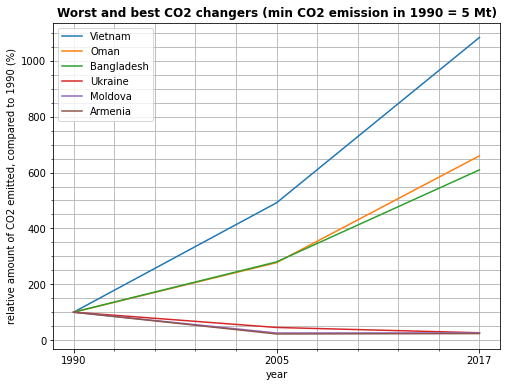

In [18]:
# Plot graph

fig, ax = plt.subplots()


for index, row in top_co2_high_change.iterrows():
  plt.plot(years, row[1:], label = row[0])

ax.legend(loc = "upper left")
ax.set_title("Worst and best CO2 changers (min CO2 emission in 1990 = 5 Mt)", fontweight = "bold")
ax.set_xlabel("year")
ax.set_ylabel("relative amount of CO2 emitted, compared to 1990 (%)")

ax.grid(which = 'both')
ax.minorticks_on()

fig.set_size_inches(8,6)